# Data preparation

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Ler os arquivos CSV
df_test = pd.read_csv("imdb_reviews_test.csv", quoting=0, on_bad_lines='skip')
df_test.count()

print("Número de linhas no conjunto de teste:", df_test.shape[0])

print(f" test set tem {sum(df_test['label'] == 'pos')} reviews positivas")
print(f" test set tem {sum(df_test['label'] == 'neg')} reviews negativas")

Número de linhas no conjunto de teste: 21996
 test set tem 10946 reviews positivas
 test set tem 11050 reviews negativas


In [3]:
# Remover duplicatas com base na coluna 'review' e mantendo a primeira ocorrência
df_test = df_test.drop_duplicates(subset=['text'], keep='first')
y = df_test.count()

print("Número de linhas no conjunto de teste após remoção de duplicatas:", y)

print(f" test set tem {sum(df_test['label'] == 'pos')} reviews positivas")
print(f" test set tem {sum(df_test['label'] == 'neg')} reviews negativas")


Número de linhas no conjunto de teste após remoção de duplicatas: text     21814
label    21814
dtype: int64
 test set tem 10888 reviews positivas
 test set tem 10926 reviews negativas


In [5]:
# Exemplo
df_test['text'] = df_test['text'].apply(lambda x: x.lower())
df_test['text'][:10]

,text
0,logan lerman & dean collins iii of jack & bobb...
1,i have seen this film on a sunday evening and ...
2,two great stars and a legendary director creat...
3,i'm originally from brazil... the sad thing ab...
4,"""witchery"" is a decent little euro trash horro..."
5,the best so bad it's good movie ever made. rud...
6,"okay, i'll say it. this movie made me laugh so..."
7,this movie almost has everything. the action i...
8,this movie is ageless and would probably appea...
9,"great book, great movie, great soundtrack. fra..."


Vader sentiment

In [6]:
analyzer = SentimentIntensityAnalyzer()

In [7]:
# Função para aplicar o VADER no texto
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Pontuação (de -1 a 1)

# Aplicar
df_test['sentiment_score'] = df_test['text'].apply(get_sentiment)

# Visualizar
print(df_test[['text', 'label', 'sentiment_score']].head())

                                                text label  sentiment_score
0  logan lerman & dean collins iii of jack & bobb...   pos           0.9773
1  i have seen this film on a sunday evening and ...   pos           0.9945
2  two great stars and a legendary director creat...   pos           0.9524
3  i'm originally from brazil... the sad thing ab...   pos          -0.7506
4  "witchery" is a decent little euro trash horro...   pos           0.3759


In [8]:
# Função para classificar
def classify_sentiment(compound_score):
    if compound_score >= 0:
        return "Positivo"
    elif compound_score < 0:
        return "Negativo"

# Aplicar
df_test['sentiment_class'] = df_test['sentiment_score'].apply(classify_sentiment)

# Visualizar
print(df_test[['text', 'label', 'sentiment_score', 'sentiment_class']].head())

                                                text label  sentiment_score  \
0  logan lerman & dean collins iii of jack & bobb...   pos           0.9773   
1  i have seen this film on a sunday evening and ...   pos           0.9945   
2  two great stars and a legendary director creat...   pos           0.9524   
3  i'm originally from brazil... the sad thing ab...   pos          -0.7506   
4  "witchery" is a decent little euro trash horro...   pos           0.3759   

  sentiment_class  
0        Positivo  
1        Positivo  
2        Positivo  
3        Negativo  
4        Positivo  


Acurácia do modelo: 70.29%
Matriz de Confusão:
[[9494 1394]
 [5087 5839]]


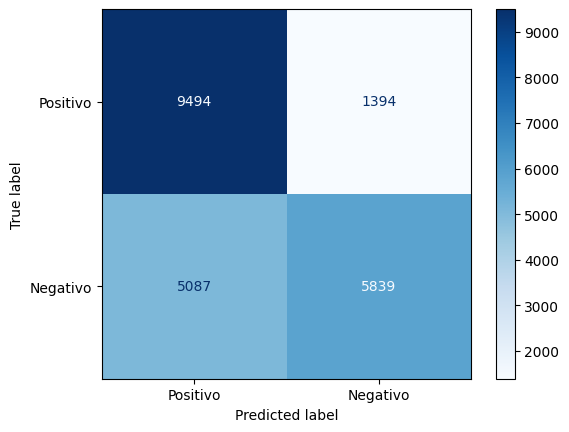

In [10]:
df_test['sentiment_class_mapped'] = df_test['sentiment_class'].map({'Positivo': 'pos', 'Negativo': 'neg'})

# 1. Calcular accuracy
accuracy = accuracy_score(df_test['label'], df_test['sentiment_class_mapped'])
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")


# 2. Calcular matriz de confusão
conf_matrix = confusion_matrix(df_test['label'], df_test['sentiment_class_mapped'], labels=['pos', 'neg'])
print("Matriz de Confusão:")
print(conf_matrix)

# 3. Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Positivo', 'Negativo'])
disp.plot(cmap='Blues', values_format='d')